In [1]:
# Step 1:Import necessary libraries
import numpy as np  # For handling numerical data
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 

In [2]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)

true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [3]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [4]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [5]:
# Step 5: Get the values of slope(m) and intercept(c) from the trained model
m= model.coef_[0]
c=model.intercept_
print("Slope (m):", m)  # m value
print("Intercept (c):",c)  # c value

Slope (m): 0.0
Intercept (c): 25.834848216909297


In [6]:
#Step 6: Display the equation of line
print(f"Equation of line : Y={m:.2f}X+{c:.2f}")

Equation of line : Y=0.00X+25.83


In [9]:
#Step 7:Predict the values using the model
Y_pred=model.predict(X_poly) #Predict salaries for given experience values

**Model Evaluation Metrics**

In [10]:
#1.Mean Squared Error - Measures average squared difference bw actual and predicted values
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE) : {mse:.2f}")

Mean Squared Error(MSE) : 11.47


In [11]:
#2.Mean Absolute Error - Measures average absolute difference bw actual and predicted values
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE) : {mae:.2f}")

Mean Absolute Error(MAE) : 2.98


In [12]:
#3.Root Mean Squared Error - Measures Standard Deviation of errors(residuals)
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse:.2f}")

Root Mean Squared Error(RMSE) : 3.39


In [13]:
#4.R-squared (R2) - Represents how well the model fits the data(0 to 1, where 1 is best fit)
r2=r2_score(Y,Y_pred)
print(f"r2_score : {r2:.2f}")

r2_score : 0.95


In [14]:
#5.Adjusted R-squared
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared : {adj_r2:.2f}")

Adjusted R-squared : 0.94


In [15]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:23:47   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


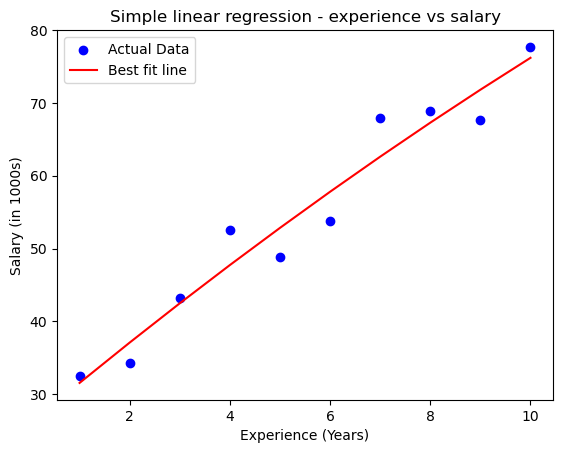

In [19]:
#Step 8:Plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data')

#Step 9:Plot the regression line(best-fit line)
plt.plot(X,Y_pred,color='red',label='Best fit line')

#Step 10:Add Labels & legend
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (in 1000s)')
plt.title('Simple linear regression - experience vs salary')
plt.legend()
plt.show()
